<a href="https://colab.research.google.com/github/sub3h/StockAnalysisInPython/blob/master/biasguard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# 라이브러리 설치

!pip install python-telegram-bot --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# 라이브러리 설치

!pip install dart-fss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# 라이브러리 설치

!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 라이브러리 설치

!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# 라이브러리 설치

!pip install -U yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
# 라이브러리 설치

!pip install -U pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 52 kB 810 kB/s 
     |████████████████████████████████| 251 kB 41.8 MB/s 


In [11]:
# 라이브러리 버전 조정

!pip install tornado==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# 데이터 수집

# 한국 주식의 주가 데이터를 수집할 수 있는 파이썬 패키지는 4가지가 있다.
# 1. FinanceDataReader
# 2. pykrx
# 3. pandas_datareader
# 4. yfinance


# 1. 종목 리스트

# 생존편향을 고려하기 위해서는 상장폐지 종목 리스트가 제공되어야 한다.
# 상장폐지 종목 리스트 제공 패키지 : FinanceDataReader, pykrx

# FinanceDataReader
# 현재 시점의 시장별 상장종목 리스트를 가져올 수 있음
# 종목코드, 시장, 종목명, 섹터, 산업군, 상장일, 결산월, 대표자, 홈페이지, 사업체 지역을 알 수 있음
# 과거 특정 시점의 상장종목 리스트는 알 수 없으나 상장폐지 종목을 조회할 수 있음

# pykrx
# 특정 시점의 상장 종목코드 조회 가능
# 해당 종목코드의 종목명을 조회하는 함수가 별도로 존재

# 2. 주가 조회

# FinanceDataReader
# 조회 시점에 따라 조회할 수 있는 최대 과거 시점이 변동됨
# 예를 들어, 2022-03-22에 조회했을 때는 1998-02-05부터 조회됐었는데, 2022-03-23에 조회했을 때는 1998-02-06부터 조회됨
# - 네이버금융에서 데이터를 가져오는데 일자가 지날 때 마다 과거 데이터를 삭제하는 것으로 보임
# 액면분할을 반영한 수정주가가 조회되는데 거래량은 보정되지 않은 상태임

# pykrx
# 1990년 데이터부터 조회 가능
# 수정주가가 디폴트로 조회됨(adjusted 옵션으로 수정주가 여부 설정가능)
# adjusted=False로 조회하면 1995-05-02부터 조회되고, 거래대금과 등락률 칼럼이 추가됨
# 액면분할을 반영한 수정주가가 조회되는데 거래량은 보정되지 않은 상태임

# yfinance
# 액면분할을 고려한 거래량 조회가능
# 재무제표 정보 제공

In [14]:
# 라이브러리 임포트

#금융
import dart_fss as dart
import telegram as tel
import FinanceDataReader as fdr
import yfinance as yf
from pykrx import stock

#데이터
import pandas as pd
import pandas_datareader as pdr
import numpy as np

#시각화
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)
plt.rcParams['axes.grid'] = True 

In [33]:
# 종목코드 취득

df_krx = fdr.StockListing('KRX') # KRX는 KOSPI,KOSDAQ,KONEX 모두 포함
df_krx = df_krx[df_krx['Market'] != 'KONEX']
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [16]:
len(df_krx)

7438

In [17]:
df_spx = fdr.StockListing('S&P500')
df_spx.head()

/usr/local/lib/python3.7/dist-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [18]:
len(df_spx)

503

In [19]:
df_nsd = fdr.StockListing('NASDAQ')
df_nsd.head()

100%|██████████| 4627/4627 [00:36<00:00, 125.67it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010


In [20]:
len(df_nsd)

4627

In [21]:
# 테스트(현대차 가격 데이터)

# df = fdr.DataReader('005380', '2019') # 현대차, 2019년부터 현재까지
df = fdr.DataReader('005380') # 현대차, 상장일부터 현재까지

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


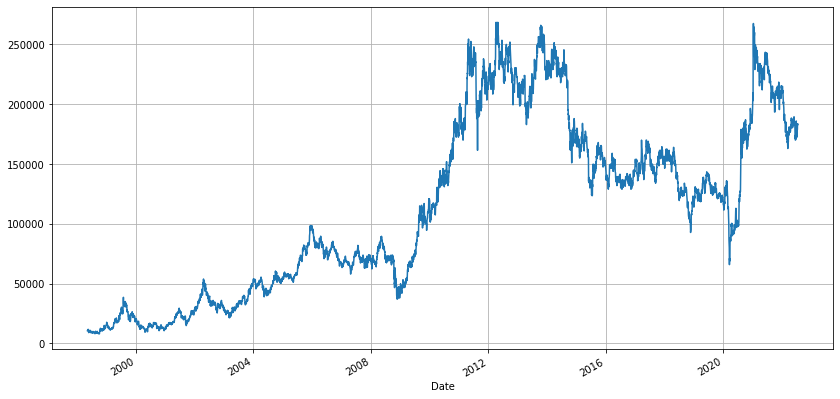

In [22]:
df['Close'].plot()

In [23]:
# 테스트(AAPL 가격 데이터)

# df = fdr.DataReader('AAPL', '2019') # AAPL, 2019년부터 현재까지
df = fdr.DataReader('AAPL') # AAPL, 상장일부터 현재까지

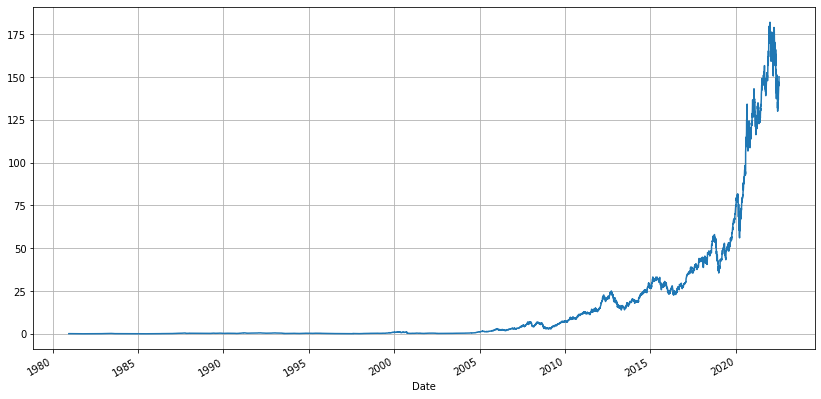

In [24]:
df['Close'].plot()

In [25]:
# 주요 지수

#KS11	  KOSPI 지수
#KQ11	  KOSDAQ 지수
#KS50	  KOSPI 50 지수
#KS100	KOSPI 100
#KRX100	KRX 100
#KS200	코스피 200

#DJI	  다우존스 지수
#IXIC	  나스닥 지수
#US500	S&P 500 지수
#VIX	  S&P 500 VIX

#JP225	  닛케이 225 선물
#STOXX50E	Euro Stoxx 50
#CSI300	  CSI 300 (중국)
#HSI	  항셍 (홍콩)
#FTSE	  영국 FTSE
#DAX	  독일 DAX 30
#CAC	  프랑스 CAC 40

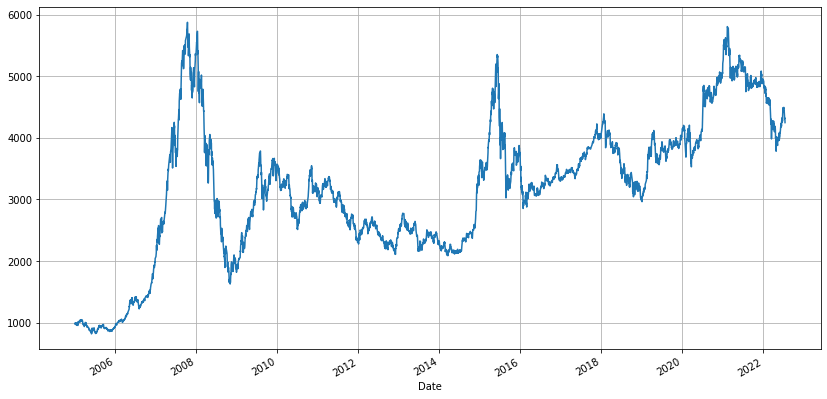

In [26]:
df = fdr.DataReader('CSI300')
df['Close'].plot()

In [27]:
# 주요 환율

#USD/KRW	달러당 원화 환율
#USD/EUR	달러당 유로화 환율
#USD/JPY	달러당 엔화 환율
#CNY/KRW	위엔화 원화 환율
#EUR/USD	유로화 달러 환율
#USD/JPY	달러 엔화 환율
#JPY/KRW	엔화 원화 환율
#AUD/USD	오스트레일리아 달러 환율
#EUR/JPY	유로화 엔화 환율
#USD/RUB	달러 루블화

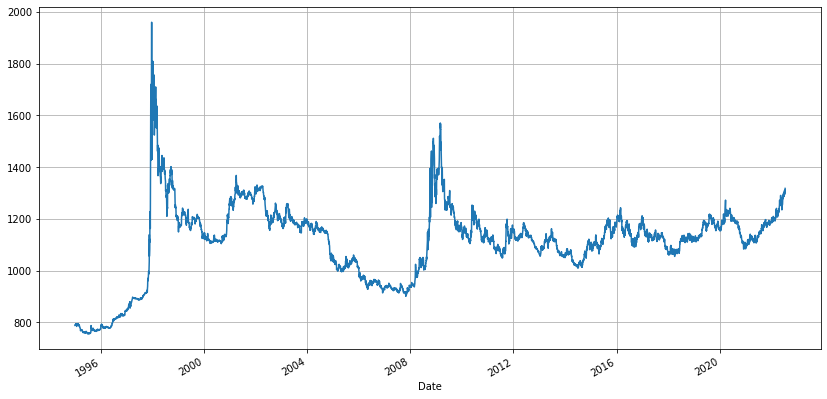

In [28]:
df = fdr.DataReader('USD/KRW', '1995')
df['Close'].plot()

In [29]:
# 암호화폐 가격

#BTC/KRW	비트코인 원화 가격
#ETH/KRW	이더리움 원화 가격
#XRP/KRW	리플 원화 가격
#BCH/KRW	비트코인 캐시 원화 가격
#EOS/KRW	이오스 원화 가격
#LTC/KRW	라이트 코인 원화 가격
#XLM/KRW	스텔라 원화 가격

#BTC/USD	비트코인 달러 가격
#ETH/USD	이더리움 달러 가격
#XRP/USD	리플 달러 가격
#BCH/USD	비트코인 캐시 달러 가격
#EOS/USD	이오스 달러 가격
#LTC/USD	라이트 코인 달러 가격
#XLM/USD	스텔라 달러 가격

#BTC	비트코인 CME 선물

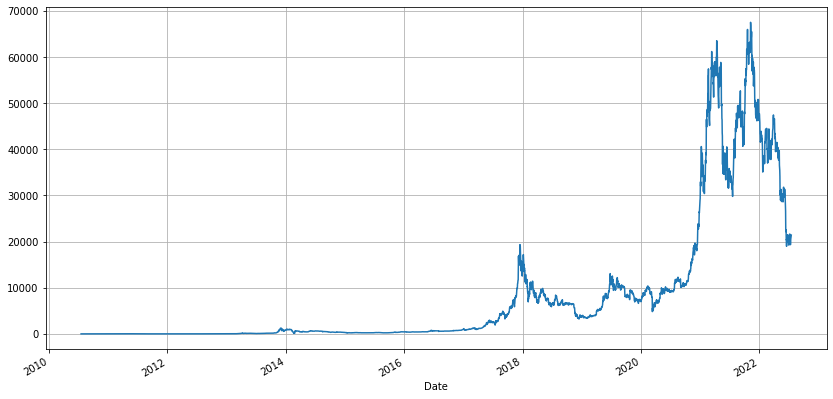

In [30]:
df = fdr.DataReader('BTC/USD')
df['Close'].plot()

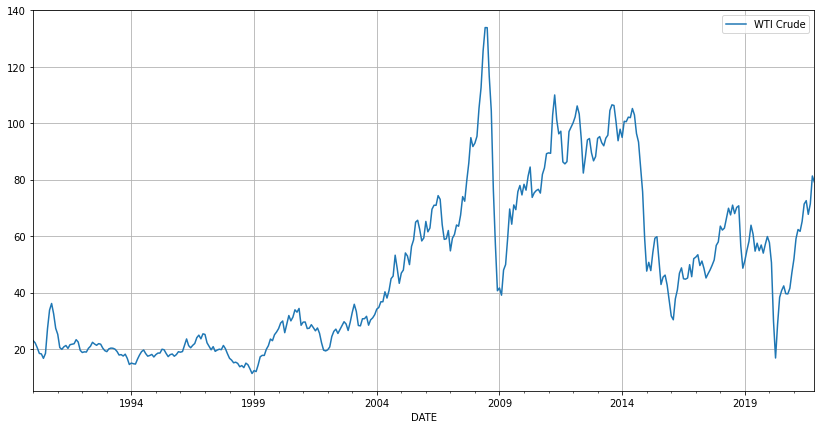

In [31]:
df_wt = pdr.DataReader('POILWTIUSDM', 'fred', start='1980-01-01')
df_wt.columns = ['WTI Crude']
df_wt.plot()

In [34]:
# S&P500 백테스트 데이터셋 만들기
# https://psystat.tistory.com/148?category=1206707

# install talib
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
 
# install yfinance
!pip install yfinance --upgrade --no-cache-dir

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4061    0  4061    0     0  15152      0 --:--:-- --:--:-- --:--:-- 15152
100  503k  100  503k    0     0   813k      0 --:--:-- --:--:-- --:--:--  813k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4069    0  4069    0     0  19014      0 --:--:-- --:--:-- --:--:-- 19014
100  406k  100  406k    0     0   708k      0 --:--:-- --:--:-- --:--:--  708k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# import packages
%matplotlib inline
 
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from scipy.stats import pearsonr, spearmanr
from talib import MFI, RSI, BBANDS, MACD
import yfinance as yf

In [36]:
# s&p 500 종목 리스트 가져오기
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' 
sp500_constituents = pd.read_html(sp_url, header=0)[0] 
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [37]:
sp500_constituents

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [40]:
# 공백으로 종목을 구분하여 하나의 스트링으로 download 함수의 tickers에 넣어줌
# yfinance에서 '.' 처리를 못하는듯 함 '-'(dash)로 바꿔서 넣어줘야 함
tickers = ' '.join(sp500_constituents.Symbol.tolist()).replace('.', '-')
prices = yf.download(tickers=tickers, 
                     start='2017-12-01', end='2022-07-17',
                     interval='1d',
                     auto_adjust=False # True: adjust all OHLC automatically
                     )

[*********************100%***********************]  503 of 503 completed


In [41]:
prices = prices.dropna(how='all')
prices

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2017-12-01   66.211449  47.758644   95.100044   40.786884   77.139915   
2017-12-04   63.849834  48.665085   99.640465   40.488811   76.258949   
2017-12-05   63.454639  48.216736   96.891312   40.450672   76.411125   
2017-12-06   63.512463  48.353184   93.395004   40.300438   75.602249   
2017-12-07   64.302879  49.591015   93.500359   40.374359   75.474106   
...                ...        ...         ...         ...         ...   
2022-07-11  123.120003  13.430000  181.750000  144.869995  151.809998   
2022-07-12  119.239998  14.770000  183.839996  145.860001  151.047134   
2022-07-13  118.650002  14.310000  185.339996  145.490005  150.739990   
2022-07-14  115.879997  14.250000  186.009995  148.470001  150.440002   
2022-07-15  118.830002  14.470000  188.710007  150.169998  153.619995   

                                                                        ...  \
                   ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2017-12-01   78.779274  194.600006   51.804070  136.969696  179.520004  ...   
2017-12-04   81.069862  189.570007   50.628803  137.511734  168.440002  ...   
2017-12-05   79.651001  187.960007   50.702843  137.997635  167.539993  ...   
2017-12-06   79.743721  187.000000   50.582539  138.558350  173.520004  ...   
2017-12-07   79.688087  187.910004   50.610302  138.866714  174.610001  ...   
...                ...         ...         ...         ...         ...  ...   
2022-07-11  141.320007  262.070007  108.408142  273.895752  384.160004  ...   
2022-07-12  141.380005  256.260010  107.820755  272.700012  375.540009  ...   
2022-07-13  139.110001  256.940002  105.740005  272.170013  371.940002  ...   
2022-07-14  139.529999  258.880005  105.709999  268.670013  372.959991  ...   
2022-07-15  142.220001  268.230011  108.820000  271.519989  379.859985  ...   

               Volume                                                          \
                 WYNN        XEL         XOM       XRAY        XYL        YUM   
Date                                                                            
2017-12-01  1803100.0  3058000.0  13779300.0  1922500.0   674800.0  2486400.0   
2017-12-04  1427100.0  2015200.0  12597700.0  1644500.0   825600.0  2309200.0   
2017-12-05  1473900.0  2762400.0   9357200.0  1509500.0   738300.0  1899500.0   
2017-12-06  1066500.0  2071000.0  13398900.0  1214400.0  1079900.0  1573900.0   
2017-12-07  1155700.0  2685800.0  11359600.0  2152000.0   744500.0  1580700.0   
...               ...        ...         ...        ...        ...        ...   
2022-07-11  9221800.0  2168000.0  15603800.0  1390500.0   555600.0   825300.0   
2022-07-12  4644500.0  1937100.0  21013000.0  1463000.0   615800.0   963700.0   
2022-07-13  2713100.0  1646400.0  19928600.0  1768200.0   663000.0  1212900.0   
2022-07-14  2199800.0  1410700.0  26343000.0  1274600.0   541500.0  1136300.0   
2022-07-15  2112200.0  2511300.0  17231200.0  1477700.0   731800.0  1301800.0   

                                                       
                  ZBH      ZBRA       ZION        ZTS  
Date                                                   
2017-12-01  1532537.0  350900.0  4038800.0  1932200.0  
2017-12-04  1424284.0  360400.0  3789700.0  3581400.0  
2017-12-05  1298933.0  266000.0  2436800.0  2261500.0  
2017-12-06   944613.0  314500.0  3233800.0  1507400.0  
2017-12-07   989521.0  341800.0  2414600.0  2694400.0  
...               ...       ...        ...        ...  
2022-07-11   996500.0  334800.0  1077600.0  1008700.0  
2022-07-12   965800.0  492800.0  1291500.0  1643000.0  
2022-07-13  1064700.0  298000.0  1385400.0  2271500.0  
2022-07-14  1175000.0  270700.0  1177000.0  1570500.0  
2022-07-15   883000.

In [42]:
prices = prices.stack().swaplevel().sort_index()
prices.columns = [col.lower().replace(' ', '_') for col in prices.columns]
prices.index.names = ['ticker', 'date']
prices

adj_close       close        high         low        open  \
ticker date                                                                     
A      2017-12-01   66.211449   68.690002   70.000000   67.230003   69.190002   
       2017-12-04   63.849834   66.239998   69.169998   66.180000   68.940002   
       2017-12-05   63.454639   65.830002   67.000000   65.730003   66.199997   
       2017-12-06   63.512463   65.889999   66.250000   65.599998   65.879997   
       2017-12-07   64.302879   66.709999   66.879997   65.769997   65.910004   
...                       ...         ...         ...         ...         ...   
ZTS    2022-07-11  177.039993  177.039993  178.460007  176.529999  177.850006   
       2022-07-12  173.809998  173.809998  179.210007  173.149994  176.699997   
       2022-07-13  167.809998  167.809998  170.970001  167.050003  170.399994   
       2022-07-14  170.789993  170.789993  170.940002  165.750000  166.929993   
       2022-07-15  174.539993  174.539993  175.210007  173.169998  173.570007   

                      volume  
ticker date                   
A      2017-12-01  2516500.0  
       2017-12-04  2899400.0  
       2017-12-05  2384000.0  
       2017-12-06  1690100.0  
       2017-12-07  2294500.0  
...                      ...  
ZTS    2022-07-11  1008700.0  
       2022-07-12  1643000.0  
       2022-07-13  2271500.0  
       2022-07-14  1570500.0  
       2022-07-15  2409300.0  

[579723 rows x 6 columns]

In [43]:
prices.to_parquet('sp500_prices_20171201_20211203.parquet')

In [45]:
# 달러 거래량
prices['dollar_vol'] = prices[['close', 'volume']].prod(axis=1)
# 달러 거래량의 21일 이평선(한달 동안의 달러 거래량 이동평균)
prices['dollar_vol_1m'] = (prices.dollar_vol.groupby('ticker').rolling(window=21).mean()).values
                           # TypeError: __init__() got an unexpected keyword argument 'level' 가 발생하면 level='date' 제외하고 코드 실행
                           
# 달러 거래량 21일 이평선의 랭킹 계산
prices['dollar_vol_rank'] = (prices.groupby('date')
                             .dollar_vol_1m
                             .rank(ascending=False))

In [46]:
from talib import MFI, RSI, BBANDS, MACD
 
#### MFI 계산
prices['mfi'] = prices.groupby(level='ticker').apply(lambda x: MFI(x['high'], 
                                                                   x['low'], 
                                                                   x['close'], 
                                                                   x['volume'])).droplevel(0)
#### RSI 계산
prices['rsi'] = prices.groupby(level='ticker').close.apply(RSI)
 
#### 볼린저밴드 상한과 하한 계산
def compute_bb(close):
    high, mid, low = BBANDS(close, timeperiod=20)
    return pd.DataFrame({'bb_high': high, 'bb_low': low}, index=close.index)
 
prices = (prices.join(prices
                      .groupby(level='ticker')
                      .close
                      .apply(compute_bb)))
prices['bb_high'] = prices.bb_high.sub(prices.close).div(prices.bb_high).apply(np.log1p)
prices['bb_low'] = prices.close.sub(prices.bb_low).div(prices.close).apply(np.log1p)
 
#### MACD 계산
def compute_macd(close):
    macd = MACD(close)[0]
    return (macd - np.mean(macd))/np.std(macd)
 
prices['macd'] = (prices
                  .groupby('ticker', group_keys=False)
                  .close
                  .apply(compute_macd))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


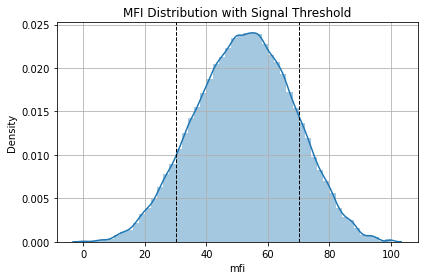

In [47]:
ax = sns.distplot(prices.mfi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('MFI Distribution with Signal Threshold')
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


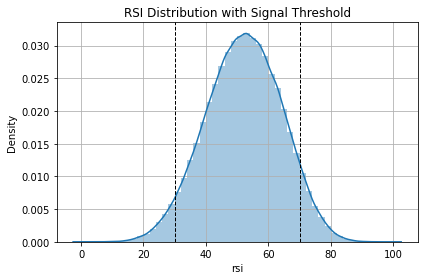

In [48]:
ax = sns.distplot(prices.rsi.dropna())
ax.axvline(30, ls='--', lw=1, c='k')
ax.axvline(70, ls='--', lw=1, c='k')
ax.set_title('RSI Distribution with Signal Threshold')
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


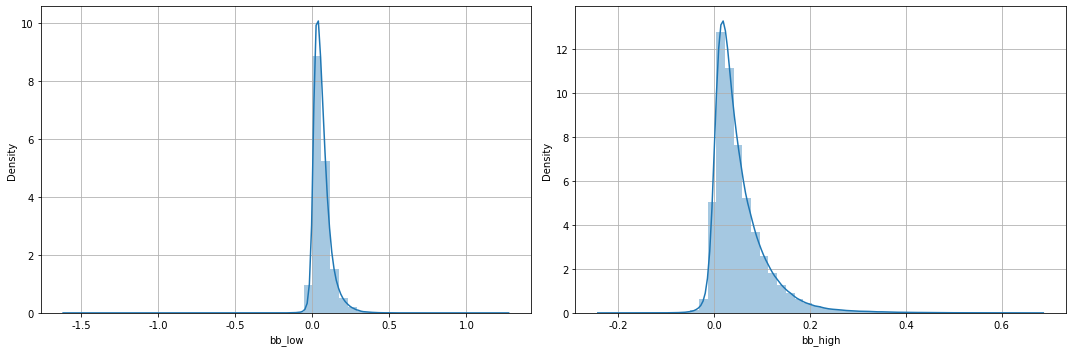

In [49]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.distplot(prices.loc[:, 'bb_low'].dropna(), ax=axes[0])
sns.distplot(prices.loc[:, 'bb_high'].dropna(), ax=axes[1])
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


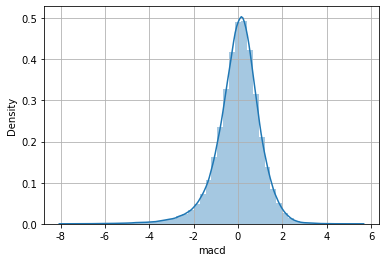

In [50]:
sns.distplot(prices.macd.dropna());

In [51]:
ndays = [1, 5, 10, 21, 42, 63]
q = 0.0001
for n in ndays:
    prices[f'return_{n}d'] = (prices.groupby(level='ticker').close
                                .pct_change(n)
                                .pipe(lambda x: x.clip(lower=x.quantile(q),
                                                       upper=x.quantile(1 - q)))
                                .add(1).pow(1/n).sub(1)
                                )

In [52]:
prices.loc[prices.index.get_level_values('ticker').isin(['AAPL']), 
           ['close']+[col for col in prices.columns if 'return_' in col]].head(10)

close  return_1d  return_5d  return_10d  return_21d  \
ticker date                                                                  
AAPL   2017-12-01  42.762501        NaN        NaN         NaN         NaN   
       2017-12-04  42.450001  -0.007308        NaN         NaN         NaN   
       2017-12-05  42.410000  -0.000942        NaN         NaN         NaN   
       2017-12-06  42.252499  -0.003714        NaN         NaN         NaN   
       2017-12-07  42.330002   0.001834        NaN         NaN         NaN   
       2017-12-08  42.342499   0.000295  -0.001972         NaN         NaN   
       2017-12-11  43.167500   0.019484   0.003358         NaN         NaN   
       2017-12-12  42.924999  -0.005618   0.002417         NaN         NaN   
       2017-12-13  43.067501   0.003320   0.003828         NaN         NaN   
       2017-12-14  43.055000  -0.000290   0.003402         NaN         NaN   

                   return_42d  return_63d  
ticker date                                
AAPL   2017-12-01         NaN         NaN  
       2017-12-04         NaN         NaN  
       2017-12-05         NaN         NaN  
       2017-12-06         NaN         NaN  
       2017-12-07         NaN         NaN  
       2017-12-08         NaN         NaN  
       2017-12-11         NaN         NaN  
       2017-12-12         NaN         NaN  
       2017-12-13         NaN         NaN  
       2017-12-14         NaN         NaN

In [53]:
lags = [1, 2, 3, 4, 5]
for lag in lags:
    for n in ndays:
        prices[f'return_{n}d_lag{lag}'] = (prices.groupby(level='ticker')[f'return_{n}d'].shift(lag))

In [54]:
prices.loc[prices.index.get_level_values('ticker').isin(['AAPL']), 
           ['close']+[col for col in prices.columns if '_lag' in col]].head(20)

close  return_1d_lag1  return_5d_lag1  return_10d_lag1  \
ticker date                                                                     
AAPL   2017-12-01  42.762501             NaN             NaN              NaN   
       2017-12-04  42.450001             NaN             NaN              NaN   
       2017-12-05  42.410000       -0.007308             NaN              NaN   
       2017-12-06  42.252499       -0.000942             NaN              NaN   
       2017-12-07  42.330002       -0.003714             NaN              NaN   
       2017-12-08  42.342499        0.001834             NaN              NaN   
       2017-12-11  43.167500        0.000295       -0.001972              NaN   
       2017-12-12  42.924999        0.019484        0.003358              NaN   
       2017-12-13  43.067501       -0.005618        0.002417              NaN   
       2017-12-14  43.055000        0.003320        0.003828              NaN   
       2017-12-15  43.492500       -0.000290        0.003402              NaN   
       2017-12-18  44.105000        0.010161        0.005374         0.001694   
       2017-12-19  43.634998        0.014083        0.004306         0.003832   
       2017-12-20  43.587502       -0.010656        0.003286         0.002852   
       2017-12-21  43.752499       -0.001089        0.002403         0.003116   
       2017-12-22  43.752499        0.003785        0.003219         0.003311   
       2017-12-26  42.642502        0.000000        0.001193         0.003281   
       2017-12-27  42.650002       -0.025370       -0.006722        -0.001223   
       2017-12-28  42.770000        0.000176       -0.004556        -0.000643   
       2017-12-29  42.307499        0.002814       -0.003780        -0.000693   

                   return_21d_lag1  return_42d_lag1  return_63d_lag1  \
ticker date                                                            
AAPL   2017-12-01              NaN              NaN              NaN   
       2017-12-04              NaN              NaN              NaN   
       2017-12-05              NaN              NaN              NaN   
       2017-12-06              NaN              NaN              NaN   
       2017-12-07              NaN              NaN              NaN   
       2017-12-08              NaN              NaN              NaN   
       2017-12-11              NaN              NaN              NaN   
       2017-12-12              NaN              NaN              NaN   
       2017-12-13              NaN              NaN              NaN   
       2017-12-14              NaN              NaN              NaN   
       2017-12-15              NaN              NaN              NaN   
       2017-12-18              NaN              NaN              NaN   
       2017-12-19              NaN              NaN              NaN   
       2017-12-20              NaN              NaN              NaN   
       2017-12-21              NaN              NaN              NaN   
       2017-12-22              NaN              NaN              NaN   
       2017-12-26              NaN              NaN              NaN   
       2017-12-27              NaN              NaN              NaN   
       2017-12-28              NaN              NaN              NaN   
       2017-12-29              NaN              NaN              NaN   

                   return_1d_lag2  return_5d_lag2  return_10d_lag2  ...  \
ticker date                                                         ...   
AAPL   2017-12-01             NaN             NaN              NaN  ...   
       2017-12-04             NaN             NaN              NaN  ...   
       2017-12-05             NaN             NaN              NaN  ...   
       2017-12-06       -0.007308             NaN              NaN  ...   
       2017-12-07       -0.000942             NaN              NaN  ...   
       2017-12-08       -0.003714             NaN              NaN  ...   
       2017-12-11        0.001834             NaN      

In [55]:
# s&p 500 종목 리스트 가져오기
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' 
sp500_constituents = pd.read_html(sp_url, header=0)[0] 
sector = sp500_constituents[['Symbol', 'GICS Sector']]
 
sector['GICS Sector'].value_counts()

Information Technology    74
Industrials               73
Financials                66
Health Care               64
Consumer Discretionary    58
Consumer Staples          33
Real Estate               31
Utilities                 29
Materials                 28
Communication Services    26
Energy                    21
Name: GICS Sector, dtype: int64

In [56]:
sector.columns = ['ticker', 'sector']
sector = sector.set_index('ticker')
prices = prices.join(sector)
prices = prices.assign(sector = prices.sector.str.replace(' ', '_'))
 
prices['year'] = prices.index.get_level_values('date').year
prices['month'] = prices.index.get_level_values('date').month
 
prices = pd.get_dummies(prices,
                        columns=['year', 'month', 'sector'],
                        prefix=['year', 'month', ''],
                        prefix_sep=['_', '_', ''],
                        drop_first=True)

In [57]:
for t in [1, 5, 10, 21]:
    prices[f'target_{t}d'] = prices.groupby(level='ticker')[f'return_{t}d'].shift(-t)

In [58]:
prices[['close', 'return_1d', 'return_1d_lag1', 'target_1d']].head()

close  return_1d  return_1d_lag1  target_1d
ticker date                                                       
A      2017-12-01  68.690002        NaN             NaN  -0.035668
       2017-12-04  66.239998  -0.035668             NaN  -0.006190
       2017-12-05  65.830002  -0.006190       -0.035668   0.000911
       2017-12-06  65.889999   0.000911       -0.006190   0.012445
       2017-12-07  66.709999   0.012445        0.000911   0.010043

In [59]:
prices.to_parquet('sp500_modeling_data.parquet')

In [63]:
# 시스템 트레이딩을 위한 데이터 사이언스 
# https://wikidocs.net/60659
# 백테스트 

In [50]:
# 테스트

# Open DART API KEY 설정
api_key='de3a2c4f555e9580eb039810e62c086588ba4428'
dart.set_api_key (api_key=api_key)

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

# 삼성전자 검색
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

# 2012년부터 연간 연결재무제표 불러오기
# fs = samsung.extract_fs(bgn_de='20210101')

# 재무제표 검색 결과를 엑셀파일로 저장 ( 기본저장위치: 실행폴더/fsdata )
# fs.save()

In [51]:
# 오늘 나온 공시 검색
# reports = dart.filings.search()

# 2022년 7월 8일부터 2022년 7월 8일까지 코스닥 주식등의대량보유상황보고서 검색 (페이지당 표시 건수: 100)
reports_d = dart.filings.search(bgn_de='20220715', end_de='20220715', page_count=100, corp_cls='K', pblntf_detail_ty='D001')

# 2022년 7월 8일부터 2022년 7월 8일까지 코스피 주식등의대량보유상황보고서 검색 (페이지당 표시 건수: 100)
reports_p = dart.filings.search(bgn_de='20220715', end_de='20220715', page_count=100, corp_cls='Y', pblntf_detail_ty='D001')

In [52]:
reports_p

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00131780',
                  'corp_name': 'SK네트웍스',
                  'flr_nm': 'SK',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000544',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '001740'},
                 {'corp_cls': 'Y',
                  'corp_code': '00103130',
                  'corp_name': '플레이그램',
                  'flr_nm': '하나모두',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000476',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '009810'},
                 {'corp_cls': 'Y',
                  'corp_code': '00164724',
                  'corp_name': '현대엘리베이터',
                  'flr_nm': '현정은',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000388',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '017800'},
                 {'corp_cls': 'Y',
                  'corp_code': '00152385',
                  'corp_name': '에이프로젠 MED',
                  'flr_nm': '지베이스',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000365',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '007460'},
                 {'corp_cls': 'Y',
                  'corp_code': '00103662',
                  'corp_name': '광명전기',
                  'flr_nm': '이재광',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000337',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '017040'},
                 {'corp_cls': 'Y',
                  'corp_code': '00137207',
                  'corp_name': '유니켐',
                  'flr_nm': '지브이에이자산운용',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000314',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '011330'},
                 {'corp_cls': 'Y',
                  'corp_code': '00108135',
                  'corp_name': '녹십자홀딩스',
                  'flr_nm': '허일섭',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000253',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '005250'},
                 {'corp_cls': 'Y',
                  'corp_code': '00118044',
                  'corp_name': '동원수산',
                  'flr_nm': '왕기철',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000242',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '030720'},
                 {'corp_cls': 'Y',
                  'corp_code': '00117498',
                  'corp_name': '스틱인베스트먼트',
                  'flr_nm': '도용환',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000195',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '026890'},
                 {'corp_cls': 'Y',
                  'corp_code': '00117498',
                  'corp_name': '스틱인베스트먼트',
                  'flr_nm': '도용환',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000144',
                  'report_nm': '[기재정정]주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '026890'},
                 {'corp_cls': 'Y',
                  'corp_code': '00173795',
                  'corp_name': '신흥',
                  'flr_nm': '이용익',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000108',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
            

In [53]:
reports_d

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'K',
                  'corp_code': '00384717',
                  'corp_name': '비엘팜텍',
                  'flr_nm': '비엘',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000501',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '065170'},
                 {'corp_cls': 'K',
                  'corp_code': '00145738',
                  'corp_name': '이화전기',
                  'flr_nm': '이트론',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000477',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '024810'},
                 {'corp_cls': 'K',
                  'corp_code': '00866062',
                  'corp_name': '엘티씨',
                  'flr_nm': '수성자산운용',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000471',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '170920'},
                 {'corp_cls': 'K',
                  'corp_code': '01264872',
                  'corp_name': '이노뎁',
                  'flr_nm': '이성진',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000453',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '303530'},
                 {'corp_cls': 'K',
                  'corp_code': '00444329',
                  'corp_name': '위메이드',
                  'flr_nm': '박관호',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000436',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '112040'},
                 {'corp_cls': 'K',
                  'corp_code': '00569646',
                  'corp_name': '영우디에스피',
                  'flr_nm': '박금성',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000422',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '143540'},
                 {'corp_cls': 'K',
                  'corp_code': '00291860',
                  'corp_name': '조광ILI',
                  'flr_nm': '김우동',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000412',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '044060'},
                 {'corp_cls': 'K',
                  'corp_code': '00125965',
                  'corp_name': 'KH 전자',
                  'flr_nm': '유니온 신기술조합 제217호',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000396',
                  'report_nm': '주식등의대량보유상황보고서(약식)',
                  'rm': '',
                  'stock_code': '111870'},
                 {'corp_cls': 'K',
                  'corp_code': '01358463',
                  'corp_name': '현대무벡스',
                  'flr_nm': '현대엘리베이터',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000395',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '319400'},
                 {'corp_cls': 'K',
                  'corp_code': '00490151',
                  'corp_name': '파트론',
                  'flr_nm': '김종구',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000372',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
                  'rm': '',
                  'stock_code': '091700'},
                 {'corp_cls': 'K',
                  'corp_code': '01290381',
                  'corp_name': '피엔케이피부임상연구센타',
                  'flr_nm': '대봉엘에스',
                  'rcept_dt': '20220715',
                  'rcp_no': '20220715000368',
                  'report_nm': '주식등의대량보유상황보고서(일반)',
             

In [54]:
p_dict = reports_p.to_dict()

In [55]:
p_dict

{'page_count': 100,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
   'corp_code': '00131780',
   'corp_name': 'SK네트웍스',
   'flr_nm': 'SK',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000544',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '001740'},
  {'corp_cls': 'Y',
   'corp_code': '00103130',
   'corp_name': '플레이그램',
   'flr_nm': '하나모두',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000476',
   'report_nm': '주식등의대량보유상황보고서(약식)',
   'rm': '',
   'stock_code': '009810'},
  {'corp_cls': 'Y',
   'corp_code': '00164724',
   'corp_name': '현대엘리베이터',
   'flr_nm': '현정은',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000388',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '017800'},
  {'corp_cls': 'Y',
   'corp_code': '00152385',
   'corp_name': '에이프로젠 MED',
   'flr_nm': '지베이스',
   'rcept_dt': '20220715',
   'rcp_no': '20220715000365',
   'report_nm': '주식등의대량보유상황보고서(일반)',
   'rm': '',
   'stock_code': '007460'},
  {'corp_cls': 'Y',
   'co

In [56]:
p_dict['report_list'][4]['rcp_no']

'20220715000365'

In [57]:
# 테스트 메세지 보내기
token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
bot = tel.Bot(token=token)
# chat_id = 567604016
chat_id = -1001702583415


bot.sendMessage(chat_id=chat_id, text="Test Message")

In [58]:
bot.sendMessage(chat_id=chat_id, text=p_dict['report_list'][4]['rcp_no'])

In [59]:
bot.sendMessage(chat_id=chat_id, text='https://dart.fss.or.kr/dsaf001/main.do?rcpNo='+p_dict['report_list'][4]['rcp_no'])

In [62]:
dart.api.shareholder.majorstock(p_dict['report_list'][4]['corp_code'])

{'list': [{'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,471,762',
   'ctr_stkrt': '8.01',
   'rcept_dt': '2020-10-30',
   'rcept_no': '20201030000430',
   'report_resn': '주식 담보계약 연장',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,900,533',
   'stkqy_irds': '0',
   'stkrt': '32.07',
   'stkrt_irds': '0'},
  {'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,471,762',
   'ctr_stkrt': '8.01',
   'rcept_dt': '2020-12-24',
   'rcept_no': '20201224000426',
   'report_resn': '주식 장내매수',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,950,533',
   'stkqy_irds': '50,000',
   'stkrt': '32.19',
   'stkrt_irds': '0.12'},
  {'corp_code': '00103662',
   'corp_name': '광명전기',
   'ctr_stkqy': '3,671,907',
   'ctr_stkrt': '8.47',
   'rcept_dt': '2020-12-30',
   'rcept_no': '20201230000731',
   'report_resn': '주식 담보(공탁) 계약',
   'report_tp': '일반',
   'repror': '이재광',
   'stkqy': '13,950,533',
   'stkqy_irds': '0',
   'stkrt': '32.19',
   'stkrt

In [63]:
dart.api.shareholder.elestock(p_dict['report_list'][4]['corp_code'])

NoDataReceived: ignored

In [46]:
# sp_stock_lmp_cnt 변동 후 주식수
# sp_stock_lmp_irds_cnt : 증감 주식수
# sp_stock_lmp_irds_rate : 증감 지분율
# sp_stock_lmp_rate : 변동후 지분율

1. 특정종목<br>
2. 6시간 마다<br>
3. 뉴스링크를 수집하고<br>
4. 새로운 링크가 있으면 텔레그램 메세지를 나에게 보내주는 코드

In [20]:
# # 라이브러리 불러오기
# import requests
# from bs4 import BeautifulSoup
# from apscheduler.schedulers.blocking import BlockingScheduler

# # 검색 키워드
# search_word = '엘앤씨바이오'

# # 텔레그램 봇 생성
# token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
# bot = telegram.Bot(token=token)

# # 스케쥴러 생성
# sched = BlockingScheduler()

# # 기존에 보냈던 링크를 담아둘 리스트
# old_links = []

# # 링크 추출 함수
# def extract_links(old_links=[]):
#     url = f'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query={search_word}'
#     req = requests.get(url)
#     html = req.text
#     soup = BeautifulSoup(html, 'html.parser')

#     search_result = soup.select_one('#news_result_list')
#     news_list = search_result.select('.bx > .news_wrap > a')

#     links = []
#     for news in news_list[:5]:
#         link = news['href']
#         links.append(link)
    
#     new_links=[]
#     for link in links:
#         if link not in old_links:
#             new_links.append(link)
    
#     return new_links
    
# # 텔레그램 메시지 전송 함수
# def send_links():
#     global old_links
#     new_links = extract_links(old_links)
#     if new_links:
#         for link in new_links:
#             bot.sendMessage(chat_id=567604016, text=link)
#     else:
#         bot.sendMessage(chat_id=567604016, text='새로운 뉴스 없음')
#     old_links += new_links.copy()
#     old_links = list(set(old_links))

# # 최초 시작
# send_links()
# # 스케쥴러 세팅 및 작동
# sched.add_job(send_links, 'interval', hours=6)
# sched.start()

In [21]:
# #Bot_StockMarketAnalysis.py

# import time
# import telegram
# from _datetime import datetime
# from bs4 import BeautifulSoup
# import numpy as np
# import pandas as pd
# from pandas import DataFrame
# from selenium import webdriver
# import json
# import os

# admin_info_file = os.getenv('APPLICATION_ADMIN_INFO') # 환경 변수에 저장한 중요 개인 정보 불러옴

# token = "5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q"
# Bot_ID = 567604016 


# def Search_Daily(stock, term):
#   web = webdriver.Chrome('chromedriver.exe')  # 크롬 웹 드라이버(본 py파일과 동일위치에 파일이 있을 경우는 별도 경로 불필요)
#   if stock != 'SEMICON':
#     url = 'https://m.stock.naver.com/sise/siseIndex.nhn?code=%s'%(stock)
#   else:
#     url = 'https://m.stock.naver.com/world/item.nhn?symbol=NAS@SOX'

#     web.get(url)
#     time.sleep(3)  # 데이터가 화면에 완전히 뜰 수 있도록 기다림
#     html_source = web.page_source
#     web.close()  # 크롬 웹드라이버 닫음

#     soup = BeautifulSoup(html_source, 'html.parser')

#     table = soup.find_all('td', class_='_child_wrapper')

#     cnt = 0  # 받은 데이터 자리 확인용(날짜, 종가)
#     date = []
#     close = []

#     df = DataFrame()
#     dt = datetime.now()  # 날짜 오류 방지를 위해 현재 날짜받아옴

#     for i in table:

#         if cnt == 0 or cnt % 7 == 0:  # 날짜 저장(0번과 7의 배수자리이므로 7을 나눠서 나머지가 0인 자리)
#             if dt.month < 5:  # 오늘이 5월 이전일 경우
#                 if i.text[:2] == '01':  # 1월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '02':  # 2월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '03':  # 3월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 elif i.text[:2] == '04':  # 4월 데이터면 올해 데이터
#                     date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#                 else:  # 모두 아닐 경우는 작년데이터로 처리
#                     date.append(str(dt.year - 1) + '-' + (i.text).replace('.', '-'))
#             else:
#                 date.append(str(dt.year) + '-' + (i.text).replace('.', '-'))
#         elif cnt == 1 or (cnt - 1) % 7 == 0:  # 종가 저장(1번과 6의 배수자리)
#             close.append((i.text).replace(',', ''))

#         cnt += 1

#     df['DATE'] = date
#     df['CLOSE'] = close

#     df['CLOSE'] = pd.to_numeric(df['CLOSE'])  # 게산을 위해서 숫자형으로 변환

#     df = df[['DATE', 'CLOSE']]
#     df = df.sort_values(by='DATE')
#     df = df.set_index('DATE', inplace=False)

#     df['MA3'] = df['CLOSE'].rolling(window=3).mean()  # 종가 3일 평균 열 생성
#     df['MA5'] = df['CLOSE'].rolling(window=5).mean()  # 종가 5일 평균 열 생성
#     df['MA10'] = df['CLOSE'].rolling(window=10).mean()  # 종가 10일 평균 열 생성
#     df['MA20'] = df['CLOSE'].rolling(window=20).mean()  # 종가 20일 평균 열 생성
#     df['SUM1'] = np.where(df['CLOSE'] - df['MA3'] > 0, 1, 0)  # 종가 > 3일 평균이면 1점, 아니면 0점 부여
#     df['SUM2'] = np.where(df['CLOSE'] - df['MA5'] > 0, 1, 0)  # 종가 > 5일 평균이면 1점, 아니면 0점 부여
#     df['SUM3'] = np.where(df['CLOSE'] - df['MA10'] > 0, 1, 0)  # 종가 > 10일 평균이면 1점, 아니면 0점 부여
#     df['SUM4'] = np.where(df['CLOSE'] - df['MA20'] > 0, 1, 0)  # 종가 > 20일 평균이면 1점, 아니면 0점 부여
#     df['SUM'] = df['SUM1'] + df['SUM2'] + df['SUM3'] + df['SUM4']  # 부여 점수 합 계산

#     score = 0
#     for i in range(1, term + 1):
#         score = np.where(df['CLOSE'] / df['CLOSE'].shift(i) > 1, 1,0) + score  # 마지막 날 기준으로 1일전 ~ 20일전까지 일별 비교하여 높으면 1, 낮으면 0으로 스코어 매겨서 더함
#     score = str(score[len(score) - 1] / term * 100)  # 기간으로 나눠서 평균모멘텀 게산함

#     result = str(df['SUM'][len(df) - 1])
#     return score, result


# if __name__ == '__main__':
#     stock = ['KOSPI', 'KOSDAQ', 'SEMICON']
#     term = 20  # 기간은 임의 지정
#     Result_data = []

#     for i in stock:
#         score, result = Search_Daily(i, term)
#         Result_data.append(score)
#         Result_data.append(result)

#     # 결과 텔레그램 전송
#     bot = tel.Bot(token)
#     bot.sendMessage(Bot_ID, '<주가지수모멘텀>' + '\n' + '1. 20일 평균 모멘텀' + '\n\t\t\t\t' + stock[0] + ' : ' + Result_data[0] + '%' + '\n\t\t\t\t'
#                         + stock[1] + ' : ' + Result_data[2] + '%' + '\n\t\t\t\t' + '반도체지수' + ' : ' + Result_data[4] + '%' + '\n'
#                         + '2. 이동평균 모멘텀(4점)' + '\n\t\t\t\t' + stock[0] + ' : ' + Result_data[1] + '\n\t\t\t\t'
#                         + stock[1] + ' : ' + Result_data[3] + '\n\t\t\t\t' + '반도체지수' + ' : ' + Result_data[5])

In [22]:
# from telegram.ext import Updater
# from telegram.ext import CommandHandler
 
# telegram_token = '5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q'
# telegram_chat_id = '567604016'
 
# bot = telegram.Bot(token = telegram_token)
# updater = Updater(token = telegram_token)
 
# def send_message(update, context):
#         bot.sendMessage(chat_id = telegram_chat_id, text = '챗봇 자동응답')
 
# def add_handler(cmd, func):
#         updater.dispatcher.add_handler(CommandHandler(cmd, func))
 
# add_handler('send', send_message)
 
# updater.start_polling()
# updater.idle()

In [23]:
# from telegram.ext import Updater
# from telegram.ext import MessageHandler, Filters
# import requests 
# from bs4 import BeautifulSoup

# # token
# with open("./token.txt") as f:
#     lines = f.readlines()
#     token = lines[0].strip()

# # updater 
# updater = Updater(token=token, use_context=True)
# dispatcher = updater.dispatcher

# def get_dividiend(code):
#     url = "https://finance.naver.com/item/main.nhn?code=" + code
#     resp = requests.get(url)
#     html = resp.text
#     soup = BeautifulSoup(html, "html5lib")
#     tags = soup.select("#_dvr")
#     dividend = tags[0].text
#     return dividend

# # message handler
# def echo(update, context):
#     user_id = update.effective_chat.id
#     user_text = update.message.text
#     dividend = get_dividiend(user_text)
#     text = f"배당수익률: {dividend}"
#     context.bot.send_message(chat_id=user_id, text=text)

# echo_handler = MessageHandler(Filters.text & (~Filters.command), echo)
# dispatcher.add_handler(echo_handler)

# # polling
# updater.start_polling()

In [24]:
# # 다른 방법

# # 라이브러리 임포트
# import requests
# import json

# # API 키 값 설정
# crtfc_key='de3a2c4f555e9580eb039810e62c086588ba4428'

# # 함수 정의
# def request_get(url) :
#     response = ""
#     cnt2 = 0
#     while str(response) != '<Response [200]>' and cnt2 < 10:
# #            print("requests request_get", url)
#         cnt2 += 1
#         try :
#             response = requests.get(url)
#             if str(response) != '<Response [200]>':
#                 print('sleep ', url)
#                 sleep(15)
#         except Exception as e:
#             print(e)
#             time.sleep(20)
#             continue
#     return response.json()

# # 특정 기업 지분 공시 내역 검색 (공시정보)
# # https://opendart.fss.or.kr/api/list.json
# # corp_cls : 법인구분 : Y(유가), K(코스닥), N(코넥스), E(기타) 없으면 전체조회
# # pblntf_ty : A : 정기공시 B : 주요사항보고 C : 발행공시 D : 지분공시 E : 기타공시
# #             F : 외부감사관련 G : 펀드공시 H : 자산유동화 I : 거래소공시 j : 공정위공시
# # https://opendart.fss.or.kr/api/list.json?crtfc_key=xxx&pblntf_ty=D&&bgn_de=20200518&end_de=20200522&corp_cls=Y&page_no=1&page_count=10

# def find_major_holder_change_all(pblntf_ty, begin ,end) :
#     home = 'https://opendart.fss.or.kr/api/list.json'
#     url = home + '?crtfc_key=' + crtfc_key + '&pblntf_ty=D' + '&bgn_de=' + \
#           begin+ '&end_de=' + end + '&corp_cls=Y&page_no=1&page_count=10'
#     print(url)
#     res = request_get(url)

#     for info in res['list'] :
#         print(info)
#     print('')



# # corp_cls : 법인구분 : Y(유가), K(코스닥), N(코넥스), E(기타) 없으면 전체조회
# # pblntf_ty : A : 정기공시 B : 주요사항보고 C : 발행공시 D : 지분공시 E : 기타공시
# #             F : 외부감사관련 G : 펀드공시 H : 자산유동화 I : 거래소공시 j : 공정위공시
# res = find_major_holder_change_all('D', '20220715', '20220715')  # type, begin, end
# print('')

In [25]:
# import telegram
 
# from telegram.ext import Updater
# from telegram.ext import CommandHandler
 
# telegram_token = '5476530317:AAHQULdoILzEa-_cG_1JqEj1poFO3Sfq11Q'
# telegram_chat_id = '567604016'
 
# bot = telegram.Bot(token = telegram_token)
# updater = Updater(token = telegram_token)
 
# def send_message(update, context):
#         bot.sendMessage(chat_id = telegram_chat_id, text = '챗봇 자동응답')
 
# def add_handler(cmd, func):
#         updater.dispatcher.add_handler(CommandHandler(cmd, func))
 
# add_handler('send', send_message)
 
# updater.start_polling()
# updater.idle()